In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as un
from class_bomba import bomba, Q2v, incert_A, error

rho, g = 997, 9.8067

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados.xlsx', sheet_name='instr')
#Info medidas -> var pressão descarga
df_desc = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados.xlsx', sheet_name='vazão1')
#Info medidas -> var pressão sucção
df_suc = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados.xlsx', sheet_name='vazão2')

#Incerteza do tipo A
ze = incert_A(df_inst.ze.values) / 100  #m
zs = incert_A(df_inst.zs.values) / 100
De = incert_A(df_inst.De.values) / 1000
Ds = incert_A(df_inst.Ds.values) / 1000
Drot = incert_A(df_inst.D.values) / 100

#Incerteza do tipo B - a/raiz(3) - Val. descarga
d_pe = un.uarray(df_desc.pe.values, (df_desc.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
d_ps = un.uarray(df_desc.ps.values, (df_desc.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
d_Q = un.uarray(df_desc.Q.values, (df_desc.Q.values*0.02)/np.sqrt(3)) #m^3/h
d_w = un.uarray(df_desc.w.values, (df_desc.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - a/raiz(3) - Val. sucção
s_pe = un.uarray(df_suc.pe.values, (-df_suc.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
s_ps = un.uarray(df_suc.ps.values, (df_suc.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
s_Q = un.uarray(df_suc.Q.values, (df_suc.Q.values*0.02)/np.sqrt(3)) #m^3/h
s_w = un.uarray(df_suc.w.values, (df_suc.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

In [14]:
b1  = bomba(d_pe, d_ps, Q2v(d_Q, De), Q2v(d_Q, Ds), ze, zs)
b2  = bomba(s_pe, s_ps, Q2v(s_Q, De), Q2v(s_Q, Ds), ze, zs)

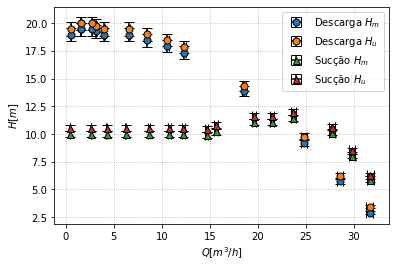

In [15]:
# Figura 1 
#%matplotlib
fig, ax = plt.subplots()
ax.set(ylabel=r'$H [m]$', xlabel=r'$Q [m^3/h]$')

#descarga
error(d_Q, b1.hm, 'o', r'Descarga $H_m$', ax)
error(d_Q, b1.hu, 'o', r'Descarga $H_u$', ax)

#sucção
error(s_Q, b2.hm, '^', r'Sucção $H_m$', ax)
error(s_Q, b2.hu, '^', r'Sucção $H_u$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('H_x_Q.pdf', bbox_inches='tight')

In [16]:
tab = pd.DataFrame({'Q':s_Q, 'Hm':b2.hm, 'Hu':b2.hu})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &              Q &            Hm &            Hu \\
\midrule
0  &     31.7+/-0.4 &   5.82+/-0.12 &   6.35+/-0.12 \\
1  &   29.80+/-0.34 &   8.02+/-0.17 &   8.56+/-0.17 \\
2  &   27.70+/-0.32 &  10.13+/-0.23 &  10.66+/-0.23 \\
3  &   23.68+/-0.27 &  11.43+/-0.29 &  11.97+/-0.29 \\
4  &   21.45+/-0.25 &  11.08+/-0.29 &  11.61+/-0.29 \\
5  &   19.60+/-0.23 &  11.08+/-0.29 &  11.61+/-0.29 \\
6  &   15.62+/-0.18 &  10.24+/-0.29 &  10.77+/-0.29 \\
7  &   14.64+/-0.17 &   9.93+/-0.29 &  10.46+/-0.29 \\
8  &   12.24+/-0.14 &  10.03+/-0.29 &  10.56+/-0.29 \\
9  &   10.78+/-0.12 &  10.03+/-0.29 &  10.56+/-0.29 \\
10 &    8.65+/-0.10 &  10.03+/-0.29 &  10.56+/-0.29 \\
11 &    6.24+/-0.07 &  10.03+/-0.29 &  10.56+/-0.29 \\
12 &    4.28+/-0.05 &  10.03+/-0.29 &  10.56+/-0.29 \\
13 &  2.640+/-0.030 &  10.03+/-0.29 &  10.56+/-0.29 \\
14 &  0.400+/-0.005 &  10.03+/-0.29 &  10.56+/-0.29 \\
\bottomrule
\end{tabular}



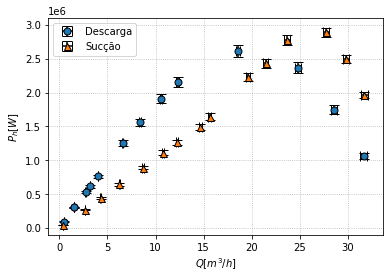

In [17]:
# Figura 2
fig, ax = plt.subplots()
ax.set(ylabel=r'$P_h[W]$', xlabel=r'$Q[m^3/h]$')

error(d_Q, b1.ph(d_Q), 'o', 'Descarga', ax)
error(s_Q, b2.ph(s_Q), '^', 'Sucção', ax)
       
ax.legend()
ax.grid(ls='dotted')
fig.savefig('P_x_Q.pdf', bbox_inches='tight')

In [18]:
tab = pd.DataFrame({'Q':s_Q, 'Ph':b2.ph(s_Q)})
print(tab.to_latex())

\begin{tabular}{lll}
\toprule
{} &              Q &                   Ph \\
\midrule
0  &     31.7+/-0.4 &    (1.97+/-0.04)e+06 \\
1  &   29.80+/-0.34 &    (2.49+/-0.06)e+06 \\
2  &   27.70+/-0.32 &    (2.89+/-0.07)e+06 \\
3  &   23.68+/-0.27 &    (2.77+/-0.07)e+06 \\
4  &   21.45+/-0.25 &    (2.44+/-0.07)e+06 \\
5  &   19.60+/-0.23 &    (2.23+/-0.06)e+06 \\
6  &   15.62+/-0.18 &    (1.65+/-0.05)e+06 \\
7  &   14.64+/-0.17 &    (1.50+/-0.04)e+06 \\
8  &   12.24+/-0.14 &    (1.26+/-0.04)e+06 \\
9  &   10.78+/-0.12 &  (1.113+/-0.033)e+06 \\
10 &    8.65+/-0.10 &    (8.93+/-0.27)e+05 \\
11 &    6.24+/-0.07 &    (6.44+/-0.19)e+05 \\
12 &    4.28+/-0.05 &    (4.42+/-0.13)e+05 \\
13 &  2.640+/-0.030 &    (2.73+/-0.08)e+05 \\
14 &  0.400+/-0.005 &    (4.13+/-0.12)e+04 \\
\bottomrule
\end{tabular}



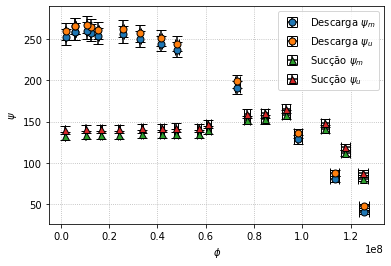

In [19]:
# Figura 3
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$\phi$')

#descarga
error(b1.phi(d_Q, d_w, De), b1.psi_m(d_w, De), 'o', r'Descarga $\psi_{m}$', ax)
error(b1.phi(d_Q, d_w, De), b1.psi_u(d_w, De), 'o', r'Descarga $\psi_{u}$', ax)

#sucção
error(b2.phi(s_Q, s_w, De), b2.psi_m(s_w, De), '^', r'Sucção $\psi_{m}$', ax)
error(b2.phi(s_Q, s_w, De), b2.psi_u(s_w, De), '^', r'Sucção $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_phi.pdf', bbox_inches='tight')

In [20]:
tab = pd.DataFrame({'psi_m':b2.psi_m(s_w, De), 'psi_u':b2.psi_u(s_w, De), 'phi':b2.psi_m(s_w, De)})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &        psi\_m &       psi\_u &          phi \\
\midrule
0  &   80.9+/-2.5 &  88.2+/-2.6 &   80.9+/-2.5 \\
1  &  111.7+/-3.5 &     119+/-4 &  111.7+/-3.5 \\
2  &      141+/-5 &     148+/-5 &      141+/-5 \\
3  &      158+/-5 &     165+/-6 &      158+/-5 \\
4  &      153+/-5 &     160+/-5 &      153+/-5 \\
5  &      152+/-5 &     159+/-5 &      152+/-5 \\
6  &      140+/-5 &     147+/-5 &      140+/-5 \\
7  &      135+/-5 &     142+/-5 &      135+/-5 \\
8  &      135+/-5 &     143+/-5 &      135+/-5 \\
9  &      135+/-5 &     142+/-5 &      135+/-5 \\
10 &      135+/-5 &     142+/-5 &      135+/-5 \\
11 &      134+/-5 &     141+/-5 &      134+/-5 \\
12 &      134+/-5 &     141+/-5 &      134+/-5 \\
13 &      133+/-5 &     141+/-5 &      133+/-5 \\
14 &      133+/-5 &     140+/-5 &      133+/-5 \\
\bottomrule
\end{tabular}



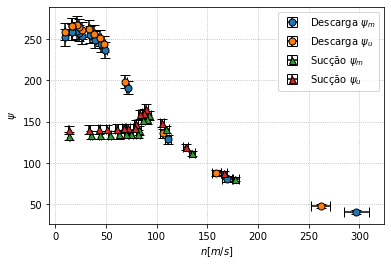

In [21]:
# Figura 4
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$n [m/s]$')

#descarga
error(b1.nq_m(d_Q, d_w), b1.psi_m(d_w, De), 'o', r'Descarga $\psi_{m}$', ax)
error(b1.nq_u(d_Q, d_w), b1.psi_u(d_w, De), 'o', r'Descarga $\psi_{u}$', ax)

#sucção
error(b2.nq_m(s_Q, s_w), b2.psi_m(s_w, De), '^', r'Sucção $\psi_{m}$', ax)
error(b2.nq_u(s_Q, s_w), b2.psi_u(s_w, De), '^', r'Sucção $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_n.pdf', bbox_inches='tight')

In [22]:
tab = pd.DataFrame({'psi_m':b2.psi_m(s_w, De), 'psi_u':b2.psi_u(s_w, De), 'nqm':b2.nq_u(s_Q, s_w), 'nqu':b2.nq_u(s_Q, s_w)})
print(tab.to_latex())

\begin{tabular}{lllll}
\toprule
{} &        psi\_m &       psi\_u &           nqm &           nqu \\
\midrule
0  &   80.9+/-2.5 &  88.2+/-2.6 &   166.1+/-3.2 &   166.1+/-3.2 \\
1  &  111.7+/-3.5 &     119+/-4 &   128.7+/-2.5 &   128.7+/-2.5 \\
2  &      141+/-5 &     148+/-5 &   105.3+/-2.2 &   105.3+/-2.2 \\
3  &      158+/-5 &     165+/-6 &    89.5+/-2.0 &    89.5+/-2.0 \\
4  &      153+/-5 &     160+/-5 &    87.2+/-2.0 &    87.2+/-2.0 \\
5  &      152+/-5 &     159+/-5 &    83.6+/-1.9 &    83.6+/-1.9 \\
6  &      140+/-5 &     147+/-5 &    79.2+/-1.9 &    79.2+/-1.9 \\
7  &      135+/-5 &     142+/-5 &    78.5+/-1.9 &    78.5+/-1.9 \\
8  &      135+/-5 &     143+/-5 &    71.5+/-1.7 &    71.5+/-1.7 \\
9  &      135+/-5 &     142+/-5 &    67.2+/-1.6 &    67.2+/-1.6 \\
10 &      135+/-5 &     142+/-5 &    60.3+/-1.5 &    60.3+/-1.5 \\
11 &      134+/-5 &     141+/-5 &    51.4+/-1.2 &    51.4+/-1.2 \\
12 &      134+/-5 &     141+/-5 &    42.6+/-1.0 &    42.6+/-1.0 \\
13 &      133+/-5 &

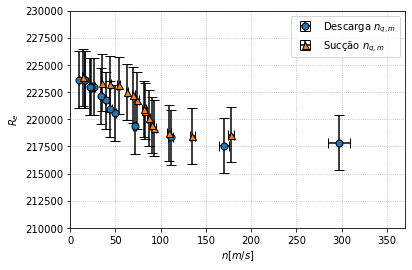

In [23]:
# Figura 5
viscosidade = 0.893e-6
fig, ax = plt.subplots()
ax.set(ylabel=r'$R_e$', xlabel=r'$n[m/s]$', ylim=(2.1e5,2.3e5), xlim=(0, 370))


#descarga
error(b1.nq_m(d_Q, d_w), b1.Re(d_w, De, viscosidade), 'o', r'Descarga $n_{q,m}$', ax)
#error(b1.Re(d_w, De, viscosidade), b1.nq_u(d_Q, d_w), 'o', r'Descarga $n_{q,u}$', ax)

#sucção
error(b2.nq_m(s_Q, s_w), b2.Re(s_w, De, viscosidade), '^', r'Sucção $n_{q,m}$', ax)
#error(b2.Re(s_w, De, viscosidade), b2.nq_u(s_Q, s_w), '^', r'Sucção $n_{q,u}$', ax)

ax.legend()
ax.grid(ls='dotted')

fig.savefig('Re_x_n.pdf', bbox_inches='tight')

In [24]:
tab = pd.DataFrame({'Re':b2.Re(s_w, De, viscosidade), 'nqm':b2.nq_u(s_Q, s_w), 'nqu':b2.nq_u(s_Q, s_w)})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &                   Re &           nqm &           nqu \\
\midrule
0  &  (2.186+/-0.026)e+05 &   166.1+/-3.2 &   166.1+/-3.2 \\
1  &  (2.185+/-0.026)e+05 &   128.7+/-2.5 &   128.7+/-2.5 \\
2  &  (2.187+/-0.026)e+05 &   105.3+/-2.2 &   105.3+/-2.2 \\
3  &  (2.192+/-0.026)e+05 &    89.5+/-2.0 &    89.5+/-2.0 \\
4  &  (2.195+/-0.026)e+05 &    87.2+/-2.0 &    87.2+/-2.0 \\
5  &  (2.201+/-0.026)e+05 &    83.6+/-1.9 &    83.6+/-1.9 \\
6  &  (2.207+/-0.026)e+05 &    79.2+/-1.9 &    79.2+/-1.9 \\
7  &  (2.210+/-0.026)e+05 &    78.5+/-1.9 &    78.5+/-1.9 \\
8  &  (2.217+/-0.026)e+05 &    71.5+/-1.7 &    71.5+/-1.7 \\
9  &  (2.222+/-0.026)e+05 &    67.2+/-1.6 &    67.2+/-1.6 \\
10 &  (2.225+/-0.026)e+05 &    60.3+/-1.5 &    60.3+/-1.5 \\
11 &  (2.231+/-0.026)e+05 &    51.4+/-1.2 &    51.4+/-1.2 \\
12 &  (2.232+/-0.026)e+05 &    42.6+/-1.0 &    42.6+/-1.0 \\
13 &  (2.234+/-0.026)e+05 &    33.4+/-0.8 &    33.4+/-0.8 \\
14 &  (2.239+/-0.026)e+05 &  13.05+/-0.32 &  